# Final Project in Python - Distracted Driving

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')
from matplotlib import*
from pylab import*
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

# Import Data

In [2]:
accident=pd.read_csv("accident.csv")

In [3]:
accident.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,SR-5,NaN,1754,33.878653,-87.325328,0,35,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,I-65,NaN,3604,34.910442,-86.908708,0,34,0,0,1,1,0,3,2,10,0,10,0,0000000,99,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,US-SR 6,NaN,1958,32.142006,-85.758456,0,42,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,SR-27,NaN,566,31.439814,-85.510300,0,53,0,0,1,1,0,4,2,10,0,10,0,0000000,99,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,US-SR 53,HINTON WATERS AVE,308,31.319331,-85.515100,0,12,6,0,2,3,0,1,1,1,0,1,0,0000000,99,99,7,16,88,88,0,0,0,1,0


In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32166 entries, 0 to 32165
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATE       32166 non-null  int64  
 1   ST_CASE     32166 non-null  int64  
 2   VE_TOTAL    32166 non-null  int64  
 3   VE_FORMS    32166 non-null  int64  
 4   PVH_INVL    32166 non-null  int64  
 5   PEDS        32166 non-null  int64  
 6   PERNOTMVIT  32166 non-null  int64  
 7   PERMVIT     32166 non-null  int64  
 8   PERSONS     32166 non-null  int64  
 9   COUNTY      32166 non-null  int64  
 10  CITY        32166 non-null  int64  
 11  DAY         32166 non-null  int64  
 12  MONTH       32166 non-null  int64  
 13  YEAR        32166 non-null  int64  
 14  DAY_WEEK    32166 non-null  int64  
 15  HOUR        32166 non-null  int64  
 16  MINUTE      32166 non-null  int64  
 17  NHS         32166 non-null  int64  
 18  RUR_URB     32166 non-null  int64  
 19  FUNC_SYS    32166 non-nul

In [5]:
distract=pd.read_csv("distract.csv")

In [6]:
distract.head()

,STATE,ST_CASE,VEH_NO,MDRDSTRD
0,1,10001,1,99
1,1,10002,1,0
2,1,10003,1,0
3,1,10004,1,99
4,1,10005,1,99


In [7]:
distract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48962 entries, 0 to 48961
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   STATE     48962 non-null  int64
 1   ST_CASE   48962 non-null  int64
 2   VEH_NO    48962 non-null  int64
 3   MDRDSTRD  48962 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [8]:
distract1=pd.merge(accident,distract)

In [9]:
distract1

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,VEH_NO,MDRDSTRD
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,SR-5,NaN,1754,33.878653,-87.325328,0,35,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,2,58,88,88,0,0,0,1,1,1,99
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,I-65,NaN,3604,34.910442,-86.908708,0,34,0,0,1,1,0,3,2,10,0,10,0,0000000,99,99,22,20,88,88,0,0,0,1,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,US-SR 6,NaN,1958,32.142006,-85.758456,0,42,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,1,45,99,99,0,0,0,1,1,1,0
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,SR-27,NaN,566,31.439814,-85.510300,0,53,0,0,1,1,0,4,2,10,0,10,0,0000000,99,99,1,15,88,88,0,0,0,1,1,1,99
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,US-SR 53,HINTON WATERS AVE,308,31.319331,-85.515100,0,12,6,0,2,3,0,1,1,1,0,1,0,0000000,99,99,7,16,88,88,0,0,0,1,0,1,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48957,56,560128,2,2,0,0,0,2,2,21,100,13,12,2015,1,11,50,1,2,3,1,2,US-30,REESE RD,3691,41.159400,-104.694200,0,12,6,0,2,2,0,1,1,1,0,1,0,0000000,11,54,12,2,12,32,0,0,0,1,0,1,0
48958,56,560128,2,2,0,0,0,2,2,21,100,13,12,2015,1,11,50,1,2,3,1,2,US-30,REESE RD,3691,41.159400,-104.694200,0,12,6,0,2,2,0,1,1,1,0,1,0,0000000,11,54,12,2,12,32,0,0,0,1,0,2,15
48959,56,560129,2,2,0,0,0,4,4,21,0,14,12,2015,2,23,5,0,1,3,1,2,US-85,NaN,533,41.531100,-104.328600,0,12,6,0,1,1,0,1,2,4,0,4,0,0000000,23,12,23,55,0,18,0,0,0,1,0,1,99
48960,56,560129,2,2,0,0,0,4,4,21,0,14,12,2015,2,23,5,0,1,3,1,2,US-85,NaN,533,41.531100,-104.328600,0,12,6,0,1,1,0,1,2,4,0,4,0,0000000,23,12,23,55,0,18,0,0,0,1,0,2,0


In [10]:
distract1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48962 entries, 0 to 48961
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATE       48962 non-null  int64  
 1   ST_CASE     48962 non-null  int64  
 2   VE_TOTAL    48962 non-null  int64  
 3   VE_FORMS    48962 non-null  int64  
 4   PVH_INVL    48962 non-null  int64  
 5   PEDS        48962 non-null  int64  
 6   PERNOTMVIT  48962 non-null  int64  
 7   PERMVIT     48962 non-null  int64  
 8   PERSONS     48962 non-null  int64  
 9   COUNTY      48962 non-null  int64  
 10  CITY        48962 non-null  int64  
 11  DAY         48962 non-null  int64  
 12  MONTH       48962 non-null  int64  
 13  YEAR        48962 non-null  int64  
 14  DAY_WEEK    48962 non-null  int64  
 15  HOUR        48962 non-null  int64  
 16  MINUTE      48962 non-null  int64  
 17  NHS         48962 non-null  int64  
 18  RUR_URB     48962 non-null  int64  
 19  FUNC_SYS    48962 non-nul

# Data Wrangling 

Dropping columns - not needed information

In [11]:
distract1.drop(['ST_CASE'],axis=1, inplace=True)
distract1.drop(['WEATHER'],axis=1, inplace=True)
distract1.drop(['WEATHER1'],axis=1, inplace=True)
distract1.drop(['WEATHER2'],axis=1, inplace=True)
distract1.drop(['NOT_HOUR'], axis=1, inplace=True)
distract1.drop(['NOT_MIN'], axis=1, inplace=True)
distract1.drop(['NHS'], axis=1,inplace=True)
distract1.drop(['RUR_URB'],axis=1, inplace=True)
distract1.drop(['ARR_HOUR'],axis=1, inplace=True)
distract1.drop(['ARR_MIN'],axis=1, inplace=True)
distract1.drop(['FUNC_SYS'],axis=1, inplace=True)
distract1.drop(['HOSP_HR'],axis=1, inplace=True)
distract1.drop(['HOSP_MN'],axis=1, inplace=True)
distract1.drop(['VE_TOTAL'],axis=1, inplace=True)
distract1.drop(['VE_FORMS'],axis=1, inplace=True)
distract1.drop(['PVH_INVL'],axis=1, inplace=True)
distract1.drop(['PERNOTMVIT'],axis=1, inplace=True)
distract1.drop(['PERMVIT'],axis=1, inplace=True)
distract1.drop(['COUNTY'],axis=1, inplace=True)
distract1.drop(['CITY'],axis=1, inplace=True)
distract1.drop(['DAY'],axis=1, inplace=True)
distract1.drop(['MONTH'],axis=1, inplace=True)
distract1.drop(['YEAR'],axis=1, inplace=True)
distract1.drop(['DAY_WEEK'],axis=1, inplace=True)
distract1.drop(['HOUR'],axis=1, inplace=True)
distract1.drop(['MINUTE'],axis=1, inplace=True)
distract1.drop(['RD_OWNER'],axis=1, inplace=True)
distract1.drop(['ROUTE'],axis=1, inplace=True)
distract1.drop(['TWAY_ID'],axis=1, inplace=True)
distract1.drop(['TWAY_ID2'],axis=1, inplace=True)
distract1.drop(['MILEPT'],axis=1, inplace=True)
distract1.drop(['SP_JUR'],axis=1, inplace=True)
distract1.drop(['HARM_EV'],axis=1, inplace=True)
distract1.drop(['MAN_COLL'],axis=1, inplace=True)
distract1.drop(['RELJCT1'],axis=1, inplace=True)
distract1.drop(['RELJCT2'],axis=1, inplace=True)
distract1.drop(['TYP_INT'],axis=1, inplace=True)
distract1.drop(['WRK_ZONE'],axis=1, inplace=True)
distract1.drop(['REL_ROAD'],axis=1, inplace=True)
distract1.drop(['LGT_COND'],axis=1, inplace=True)
distract1.drop(['RAIL'],axis=1, inplace=True)

In [12]:
distract1.head()

,STATE,PEDS,PERSONS,LATITUDE,LONGITUD,SCH_BUS,CF1,CF2,CF3,FATALS,DRUNK_DR,VEH_NO,MDRDSTRD
0,1,0,1,33.878653,-87.325328,0,0,0,0,1,1,1,99
1,1,0,1,34.910442,-86.908708,0,0,0,0,1,0,1,0
2,1,0,2,32.142006,-85.758456,0,0,0,0,1,1,1,0
3,1,0,1,31.439814,-85.510300,0,0,0,0,1,1,1,99
4,1,0,2,31.319331,-85.515100,0,0,0,0,1,0,1,99


In [13]:
distract1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48962 entries, 0 to 48961
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     48962 non-null  int64  
 1   PEDS      48962 non-null  int64  
 2   PERSONS   48962 non-null  int64  
 3   LATITUDE  48962 non-null  float64
 4   LONGITUD  48962 non-null  float64
 5   SCH_BUS   48962 non-null  int64  
 6   CF1       48962 non-null  int64  
 7   CF2       48962 non-null  int64  
 8   CF3       48962 non-null  int64  
 9   FATALS    48962 non-null  int64  
 10  DRUNK_DR  48962 non-null  int64  
 11  VEH_NO    48962 non-null  int64  
 12  MDRDSTRD  48962 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 5.2 MB


Decoding Distractions

List of distractions broken down by numbers

In [14]:
distractionData = {0: 'Not Distracted', 1: 'Looked But Did Not See',
           3: 'By Other Occupant(s)', 4: 'By a Moving Object in Vehicle',
           5: 'While Talking or Listening to Cellular Phone',
           6: 'While Manipulating Cellular Phone',
           7: 'While Adjusting Audio or Climate Controls',
           9: 'While Using Other Component/Controls Integral to Vehicle',
           10: 'While Using or Reaching For Device/Object Brought Into Vehicle',
           12: 'Distracted by Outside Person, Object or Event',
           13: 'Eating or Drinking',
           14: 'Smoking Related',
           15: 'Other Cellular Phone Related',
           16: 'No Driver Present/Unknown if Driver Present',
           17: 'Distraction/Inattention',
           18: 'Distraction/Careless',
           19: 'Careless/Inattentive',
           92: 'Distraction (Distracted), Details Unknown',
           93: 'Inattention (Inattentive), Details Unknown',
           96: 'Not Reported',
           97: 'Lost In Thought/Day Dreaming',
           98: 'Other Distraction',
           99: 'Unknown if Distracted'}

distract1['distractionData'] = distract1['MDRDSTRD'].apply(lambda x: distractionData[x])

List of states broken down by numbers

In [15]:
states = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 
          6: 'California', 8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 
          11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 
          16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 
          21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 
          25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 
          28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 
          32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 
          36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 
          40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 43: 'Puerto Rico', 
          44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 
          48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 52: 'Virgin Islands', 
          53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'}

distract1['state']=distract1['STATE'].apply(lambda x: states[x])

In [16]:
distract1['state'].value_counts('MDRDSTRD').to_frame()

,state
Texas,0.099996
California,0.090213
Florida,0.085066
Georgia,0.041828
North Carolina,0.039847
Pennsylvania,0.034312
Ohio,0.033475
New York,0.030738
Michigan,0.029411
South Carolina,0.028716


Totals on the different distractions while driving

In [17]:
distract1['distractionData'].value_counts().to_frame()

,distractionData
Not Distracted,33274
Unknown if Distracted,7029
Not Reported,4688
"Inattention (Inattentive), Details Unknown",1209
Distraction/Inattention,420
Looked But Did Not See,397
Other Distraction,324
No Driver Present/Unknown if Driver Present,268
"Distraction (Distracted), Details Unknown",248
Other Cellular Phone Related,203


Total distractions by state

In [18]:
distract1.groupby(['state']).agg({'MDRDSTRD':sum})

,MDRDSTRD
state,
Alabama,41070
Alaska,5285
Arizona,58076
Arkansas,48074
California,100044
Colorado,27115
Connecticut,17203
Delaware,3434
District of Columbia,2367


Total number of MDRDSTRD (distractions)

In [19]:
distract1["MDRDSTRD"].sum()

1336693

Total number of fatals by state

In [20]:
distract1.groupby(['state']).agg({'FATALS':sum})

,FATALS
state,
Alabama,1316
Alaska,101
Arizona,1394
Arkansas,844
California,4881
Colorado,868
Connecticut,402
Delaware,199
District of Columbia,30


Total number of fatals

In [21]:
distract1["FATALS"].sum()

54494

Total number of driving while intoxicated by state

In [22]:
distract1.groupby(['state']).agg({'DRUNK_DR':sum})

,DRUNK_DR
state,
Alabama,309
Alaska,30
Arizona,374
Arkansas,196
California,1139
Colorado,256
Connecticut,128
Delaware,52
District of Columbia,6


Total number of drunk drivers

In [23]:
distract1["DRUNK_DR"].sum()    

13065

Total number of people in vehicles at time of accidents

In [24]:
distract1.groupby(['state']).agg({'PERSONS':sum})

,PERSONS
state,
Alabama,3429
Alaska,326
Arizona,3728
Arkansas,2011
California,12880
Colorado,2357
Connecticut,1119
Delaware,534
District of Columbia,69


Total number of persons

In [25]:
distract1["PERSONS"].sum() 

147523

In [26]:
distract1.dropna(inplace=True)

In [27]:
distract1.head()

,STATE,PEDS,PERSONS,LATITUDE,LONGITUD,SCH_BUS,CF1,CF2,CF3,FATALS,DRUNK_DR,VEH_NO,MDRDSTRD,distractionData,state
0,1,0,1,33.878653,-87.325328,0,0,0,0,1,1,1,99,Unknown if Distracted,Alabama
1,1,0,1,34.910442,-86.908708,0,0,0,0,1,0,1,0,Not Distracted,Alabama
2,1,0,2,32.142006,-85.758456,0,0,0,0,1,1,1,0,Not Distracted,Alabama
3,1,0,1,31.439814,-85.510300,0,0,0,0,1,1,1,99,Unknown if Distracted,Alabama
4,1,0,2,31.319331,-85.515100,0,0,0,0,1,0,1,99,Unknown if Distracted,Alabama


In [28]:
p = pd.pivot_table(distract1, values='MDRDSTRD', 
                   index=['state'], columns=['distractionData'], aggfunc=np.sum)

In [57]:
p.head()

distractionData,By Other Occupant(s),By a Moving Object in Vehicle,Careless/Inattentive,"Distracted by Outside Person, Object or Event","Distraction (Distracted), Details Unknown",Distraction/Careless,Distraction/Inattention,Eating or Drinking,"Inattention (Inattentive), Details Unknown",Looked But Did Not See,Lost In Thought/Day Dreaming,No Driver Present/Unknown if Driver Present,Not Distracted,Not Reported,Other Cellular Phone Related,Other Distraction,Smoking Related,Unknown if Distracted,While Adjusting Audio or Climate Controls,While Manipulating Cellular Phone,While Talking or Listening to Cellular Phone,While Using Other Component/Controls Integral to Vehicle,While Using or Reaching For Device/Object Brought Into Vehicle
state,,,,,,,,,,,,,,,,,,,,,,,
Alabama,24.0,NaN,NaN,96.0,1012.0,NaN,17.0,NaN,NaN,8.0,NaN,48.0,0.0,NaN,75.0,196.0,14.0,39501.0,7.0,42.0,10.0,NaN,20.0
Alaska,6.0,4.0,NaN,48.0,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,0.0,2112.0,NaN,98.0,NaN,2970.0,NaN,12.0,NaN,9.0,NaN
Arizona,24.0,NaN,NaN,120.0,92.0,NaN,153.0,13.0,NaN,64.0,NaN,48.0,0.0,960.0,90.0,294.0,NaN,56133.0,14.0,18.0,25.0,18.0,10.0
Arkansas,NaN,NaN,323.0,120.0,92.0,NaN,NaN,NaN,NaN,1.0,NaN,16.0,0.0,26496.0,15.0,490.0,NaN,20493.0,NaN,18.0,10.0,NaN,NaN
California,45.0,NaN,38.0,96.0,184.0,NaN,153.0,78.0,1767.0,51.0,NaN,544.0,0.0,53088.0,30.0,1372.0,14.0,42372.0,35.0,54.0,85.0,18.0,20.0


In [30]:
x = distract1[['STATE', 'PEDS', 'PERSONS', 'LATITUDE', 'LONGITUD', ]]

In [31]:
y = distract1['MDRDSTRD']

In [32]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.4,random_state=101)

In [33]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(29377, 5) (29377,)
(19585, 5) (19585,)


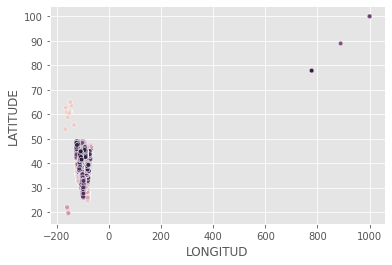

In [34]:
sns.scatterplot(x='LONGITUD', y='LATITUDE', data=distract1, hue='STATE', legend=False,s=20)
plt.show()

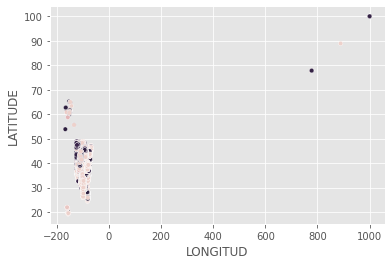

In [35]:
sns.scatterplot(x='LONGITUD', y='LATITUDE', data=distract1, hue='MDRDSTRD', legend=False,s=20)
plt.show()

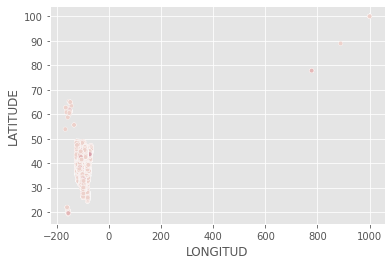

In [60]:
sns.scatterplot(x='LONGITUD', y='LATITUDE', data=distract1, hue='FATALS', legend=False,s=20)
plt.show()

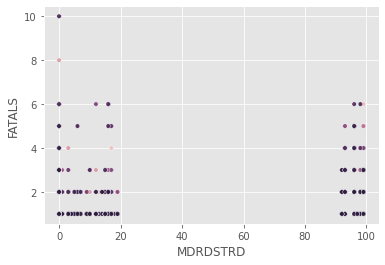

In [61]:
sns.scatterplot(x='MDRDSTRD', y='FATALS', data=distract1, hue='STATE', legend=False,s=20)
plt.show()

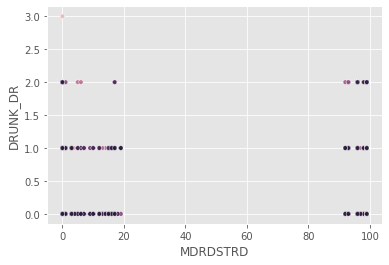

In [62]:
sns.scatterplot(x='MDRDSTRD', y='DRUNK_DR', data=distract1, hue='STATE', legend=False,s=20)
plt.show()

# Assumptions for Linear Regression

Testing Assumptions

Testing for Linear Relationship between x and y -this is a funnel shape and not a straight line

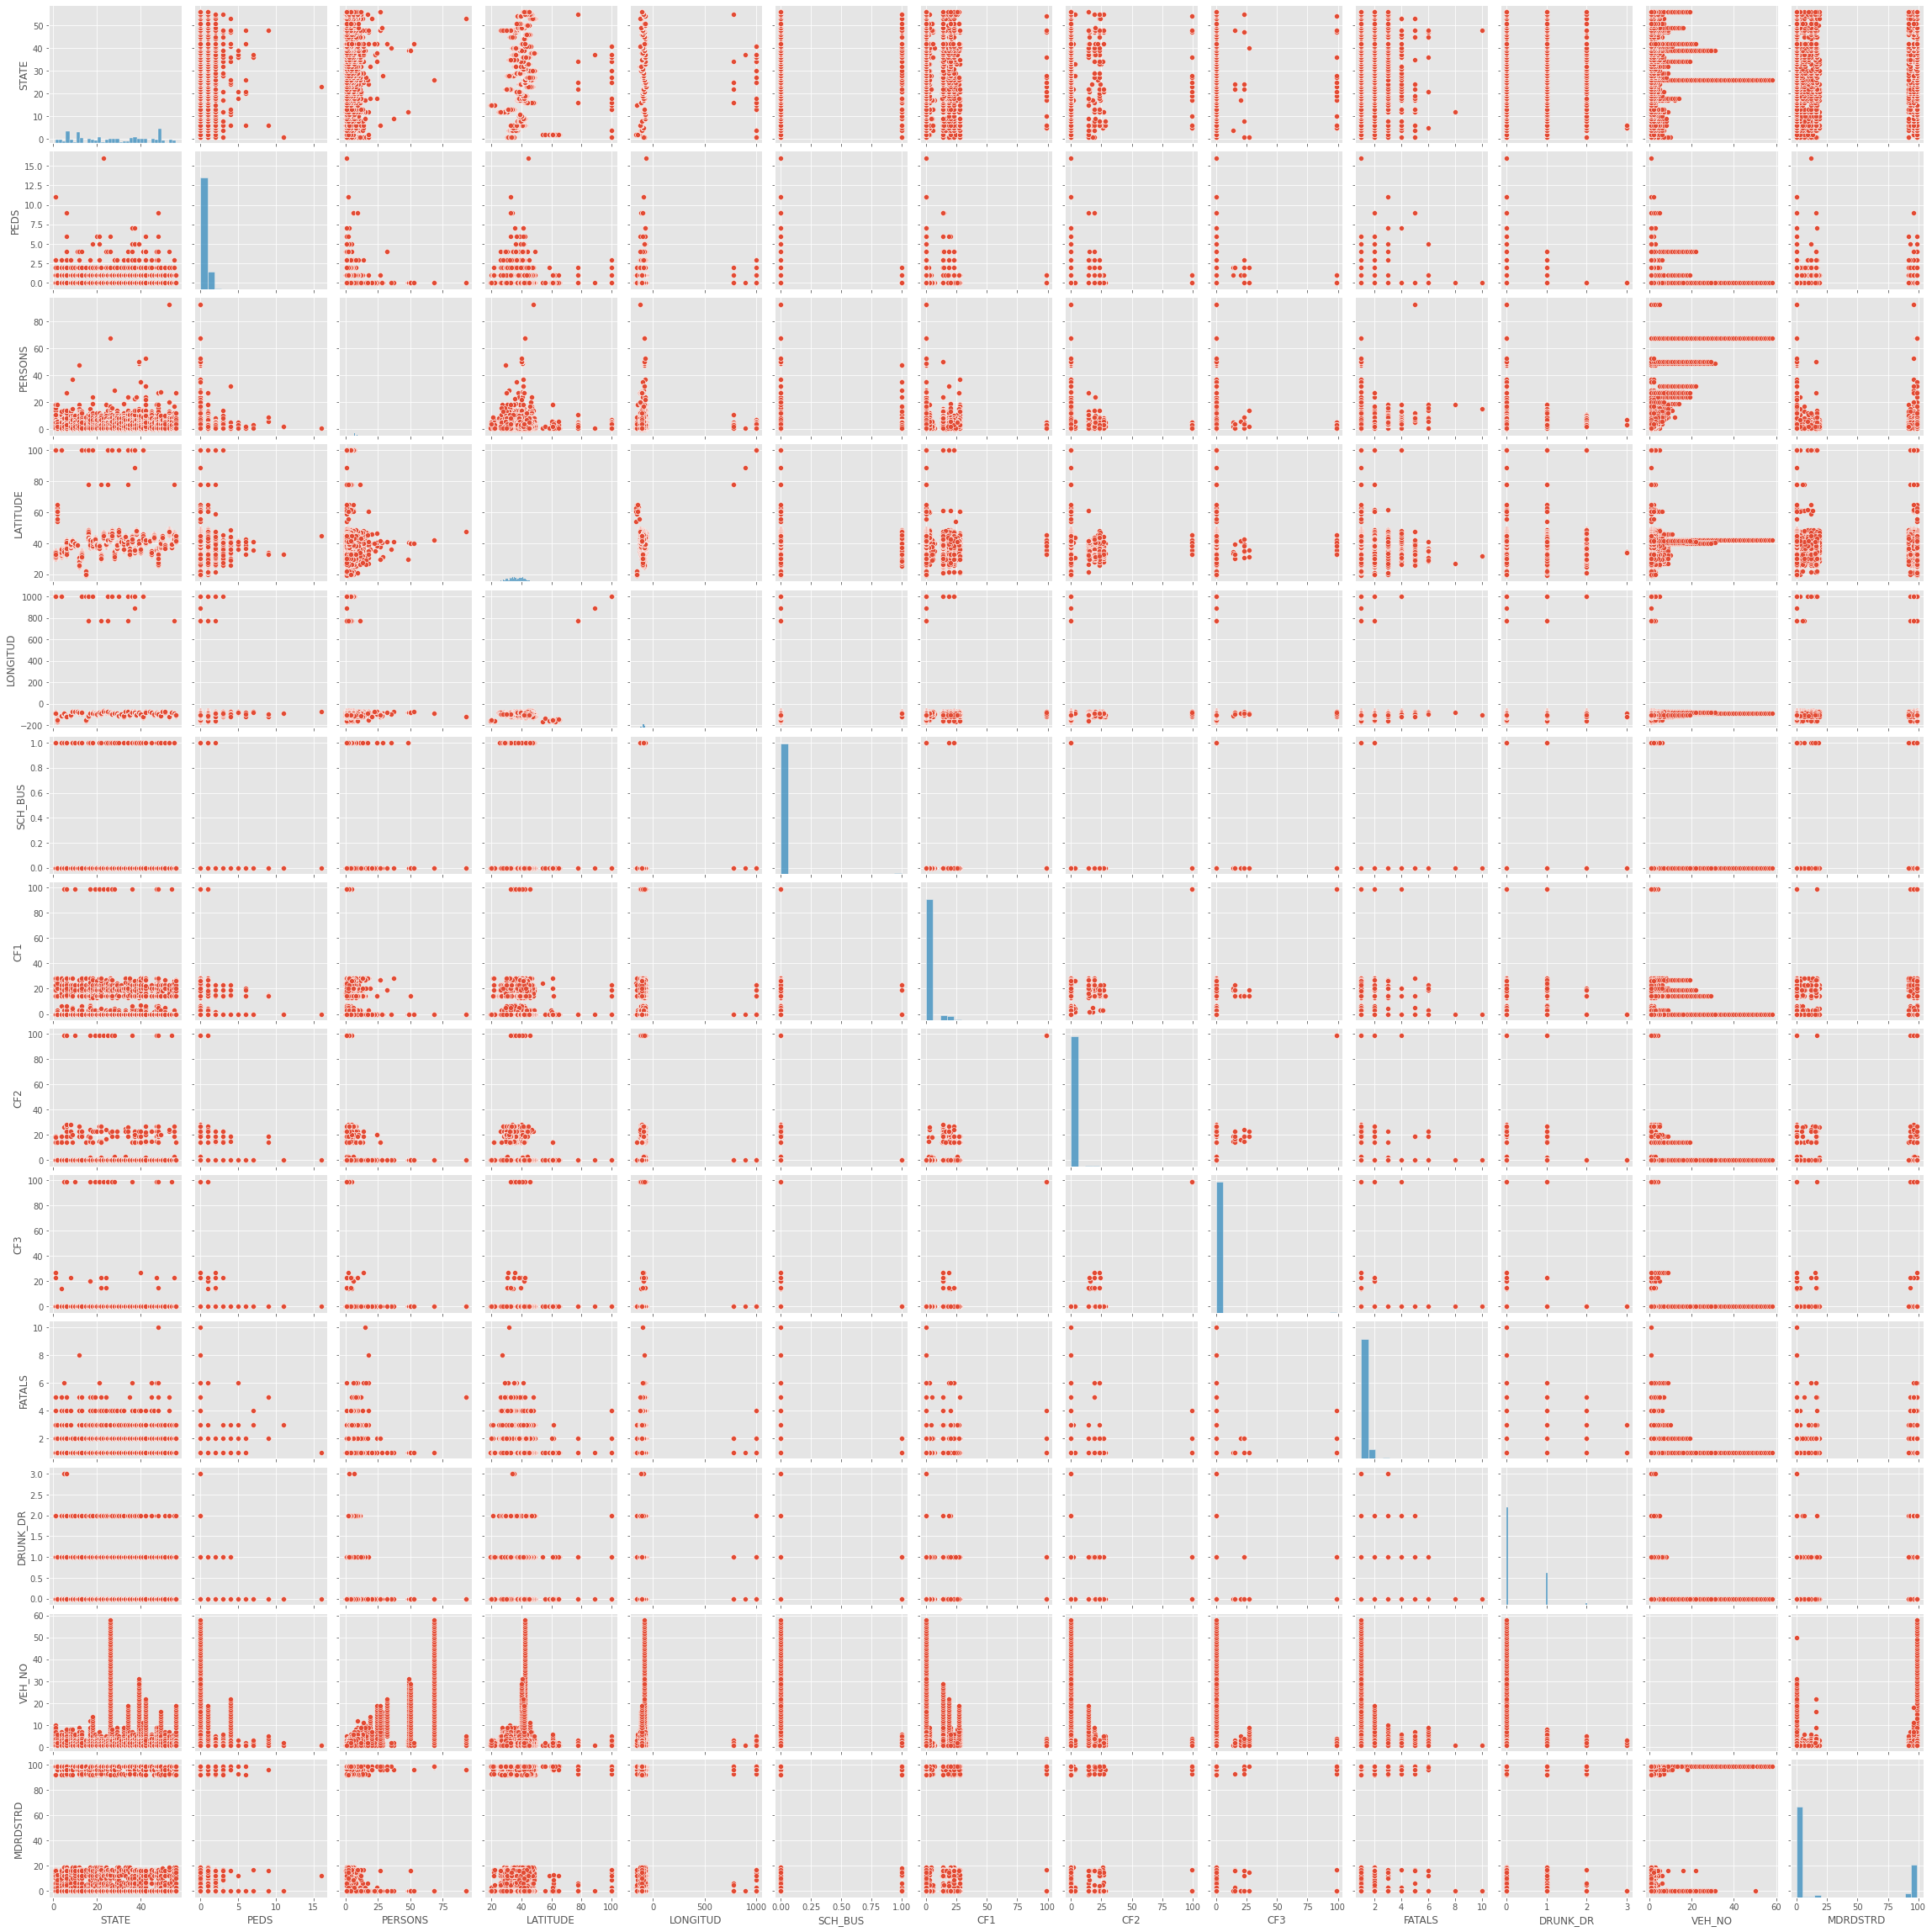

In [36]:
sns.pairplot(distract1)

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MDRDSTRD', ylabel='Density'>

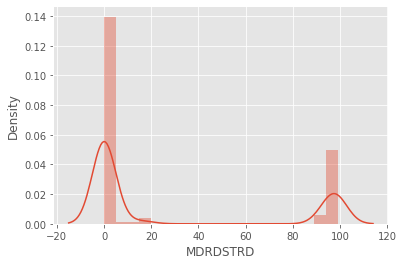

In [37]:
sns.distplot(distract1['MDRDSTRD'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DRUNK_DR', ylabel='Density'>

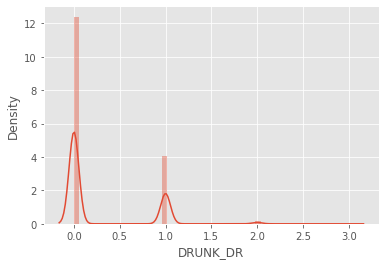

In [38]:
sns.distplot(distract1['DRUNK_DR'])

In [39]:
X = distract1['MDRDSTRD']
y = distract1['DRUNK_DR']

In [40]:
model = sm.OLS(y,x).fit()

Testing for Homoscedasticity -is not normal

In [41]:
pred_val = model.fittedvalues.copy()
true_val = distract1['MDRDSTRD'].values.copy()
residual = true_val - pred_val

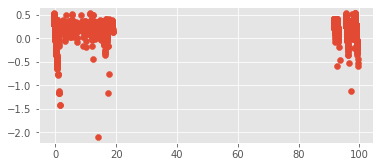

In [42]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

Breuch Pagan Test

In [43]:
sms.diagnostic.het_breuschpagan(residual, distract1[['MDRDSTRD']])

(48853.79648443349, nan, 22105850.416700795, 0.0)

Is < .05 (stastically significant), which means assumption of homoscedasticity and your data is, in fact, heteroscedasticy
generalized least squares would possible work better

Testing for Homegenity of Variance - is not constant

Testing the X as a known Constant - unknown error

Multicollinearity: the observations are independent

In [44]:
distract1.corr()

,STATE,PEDS,PERSONS,LATITUDE,LONGITUD,SCH_BUS,CF1,CF2,CF3,FATALS,DRUNK_DR,VEH_NO,MDRDSTRD
STATE,1.000000,-0.039259,0.015912,0.140014,0.005028,0.004655,-0.026402,-0.001139,-0.009148,0.013322,0.013018,0.009535,-0.052335
PEDS,-0.039259,1.000000,-0.089630,-0.015732,0.010646,-0.011088,0.071068,0.045892,0.006497,-0.020301,-0.145001,-0.048471,-0.031322
PERSONS,0.015912,-0.089630,1.000000,0.018296,-0.014422,0.052766,0.105246,0.021327,0.000094,0.172080,-0.056139,0.713111,-0.040429
LATITUDE,0.140014,-0.015732,0.018296,1.000000,0.649353,0.001903,0.005647,0.005152,0.013373,-0.010569,0.022856,0.017966,0.017873
LONGITUD,0.005028,0.010646,-0.014422,0.649353,1.000000,-0.003253,-0.018051,-0.003102,0.001711,-0.003564,-0.003259,-0.007345,0.009410
SCH_BUS,0.004655,-0.011088,0.052766,0.001903,-0.003253,1.000000,-0.008382,-0.004633,-0.002342,-0.003356,-0.023650,0.008794,-0.006864
CF1,-0.026402,0.071068,0.105246,0.005647,-0.018051,-0.008382,1.000000,0.561000,0.511265,0.019081,-0.021188,0.088534,-0.027694
CF2,-0.001139,0.045892,0.021327,0.005152,-0.003102,-0.004633,0.561000,1.000000,0.876784,0.018254,-0.015355,0.019091,0.010365
CF3,-0.009148,0.006497,0.000094,0.013373,0.001711,-0.002342,0.511265,0.876784,1.000000,0.000611,-0.005947,0.001751,0.024386
FATALS,0.013322,-0.020301,0.172080,-0.010569,-0.003564,-0.003356,0.019081,0.018254,0.000611,1.000000,0.043739,0.040706,0.006455


<AxesSubplot:>

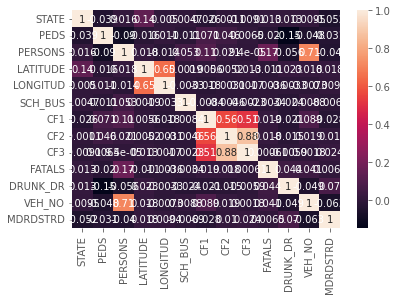

In [45]:
sns.heatmap(distract1.corr(), annot=True)

Testing for Outliers - Three outliers

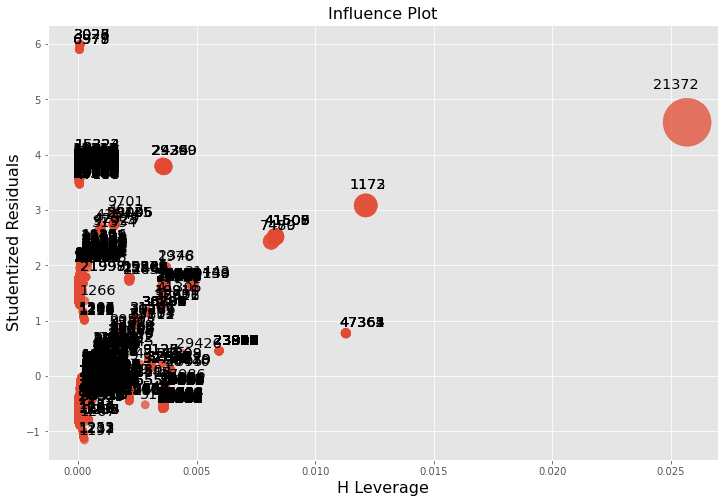

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [47]:
infl = model.get_influence()
print(infl.summary_frame())

       dfb_STATE  dfb_PEDS  dfb_PERSONS  dfb_LATITUDE  dfb_LONGITUD   cooks_d  \
0      -0.010880 -0.002926    -0.003405      0.011691     -0.004215  0.000036   
1       0.004451  0.001197     0.001409     -0.004826      0.001637  0.000006   
2      -0.010676 -0.002705    -0.001339      0.010716     -0.004114  0.000033   
3      -0.010401 -0.002794    -0.003147      0.011002     -0.004351  0.000033   
4       0.003537  0.000894     0.000416     -0.003520      0.001409  0.000004   
...          ...       ...          ...           ...           ...       ...   
48957  -0.005168  0.001268     0.001363      0.001706     -0.000043  0.000009   
48958  -0.005168  0.001268     0.001363      0.001706     -0.000043  0.000009   
48959  -0.004895  0.001088    -0.000360      0.002112     -0.000263  0.000008   
48960  -0.004895  0.001088    -0.000360      0.002112     -0.000263  0.000008   
48961  -0.005146  0.001642     0.002746      0.000812      0.000042  0.000011   

       standard_resid  hat_

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               DRUNK_DR   R-squared (uncentered):                   0.264
Model:                            OLS   Adj. R-squared (uncentered):              0.264
Method:                 Least Squares   F-statistic:                              3518.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                        0.00
Time:                        14:25:46   Log-Likelihood:                         -31580.
No. Observations:               48962   AIC:                                  6.317e+04
Df Residuals:                   48957   BIC:                                  6.321e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
STATE          0.0001      0.000      1.079      0.280      -0.000       0.000
PEDS          -0.1525      0.005    -32.605      0.000      -0.162      -0.143
PERSONS       -0.0082      0.001    -14.995      0.000      -0.009      -0.007
LATITUDE       0.0073      0.000     60.901      0.000       0.007       0.008
LONGITUD      -0.0005   2.32e-05    -19.738      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     9339.619   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15621.986
Skew:                           1.330   Prob(JB):                         0.00
Kurtosis:                       3.760   Cond. No.                         277.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Distractions in each state while involved in accidents')

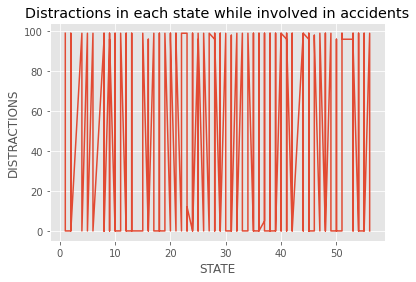

In [49]:
plt.plot(distract1['STATE'], distract1['MDRDSTRD'])
plt.xlabel('STATE')
plt.ylabel('DISTRACTIONS')
plt.title("Distractions in each state while involved in accidents")

In [50]:
distract1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,STATE,PEDS,PERSONS,LATITUDE,LONGITUD,SCH_BUS,CF1,CF2,CF3,FATALS,DRUNK_DR,VEH_NO,MDRDSTRD
STATE,1.0,-0.039,0.016,0.14,0.005,0.0047,-0.026,-0.0011,-0.0091,0.013,0.013,0.0095,-0.052
PEDS,-0.039,1.0,-0.09,-0.016,0.011,-0.011,0.071,0.046,0.0065,-0.02,-0.15,-0.048,-0.031
PERSONS,0.016,-0.09,1.0,0.018,-0.014,0.053,0.11,0.021,9.4e-05,0.17,-0.056,0.71,-0.04
LATITUDE,0.14,-0.016,0.018,1.0,0.65,0.0019,0.0056,0.0052,0.013,-0.011,0.023,0.018,0.018
LONGITUD,0.005,0.011,-0.014,0.65,1.0,-0.0033,-0.018,-0.0031,0.0017,-0.0036,-0.0033,-0.0073,0.0094
SCH_BUS,0.0047,-0.011,0.053,0.0019,-0.0033,1.0,-0.0084,-0.0046,-0.0023,-0.0034,-0.024,0.0088,-0.0069
CF1,-0.026,0.071,0.11,0.0056,-0.018,-0.0084,1.0,0.56,0.51,0.019,-0.021,0.089,-0.028
CF2,-0.0011,0.046,0.021,0.0052,-0.0031,-0.0046,0.56,1.0,0.88,0.018,-0.015,0.019,0.01
CF3,-0.0091,0.0065,9.4e-05,0.013,0.0017,-0.0023,0.51,0.88,1.0,0.00061,-0.0059,0.0018,0.024
FATALS,0.013,-0.02,0.17,-0.011,-0.0036,-0.0034,0.019,0.018,0.00061,1.0,0.044,0.041,0.0065


Pie Chart

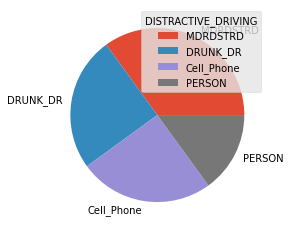

In [64]:
y = np.array([35, 25, 25, 15])
mylabels = ["MDRDSTRD", "DRUNK_DR", "Cell_Phone", "PERSON"]

plt.pie(y, labels = mylabels)
plt.legend(title = "DISTRACTIVE_DRIVING")
plt.show() 